<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 190.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 200.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 173.7 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
#df = pd.read_csv(file_url)
df = pd.read_csv("cleaned_analyzed_visualized_survey_data.csv")

#Display the top 5 records
df.head()


/tmp/ipykernel_303/385464631.py:5: DtypeWarning: Columns (119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_analyzed_visualized_survey_data.csv")


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_Zscore,ConvertedCompYearly_scaled,Employment_split,JobSatGroup,Employment_split_length,Employment_Status,Work_Type
0,8,i am learning to code,18-24 years old,secondary,NaN,apples,hobby,secondary,"other online resources (e.g., videos, blogs, f...",technical documentation;video-based online cou...,...,difficult,-0.067514,7.0,-0.067514,0.003998,"['student, full-time', 'not employed, but look...",Medium,2,"student, full-time","not employed, but looking for work"
1,25,i am a developer by profession,35-44 years old,Bachelor,remote,apples,contribute to open-source projects,Bachelor,books / physical media;colleague;other online ...,blogs;books;stack overflow;social media;how-to...,...,easy,-0.067514,4.0,-0.067514,0.003998,"['employed, full-time', 'student, part-time']",Medium,2,"employed, full-time","student, part-time"
2,28,i am a developer by profession,25-34 years old,professional degree,remote,apples,hobby,professional degree,books / physical media;on the job training,technical documentation;blogs;written tutorial...,...,neither easy nor difficult,-0.067514,7.0,-0.067514,0.003998,"['employed, full-time', 'independent contracto...",Medium,2,"employed, full-time","independent contractor, freelancer, or self-em..."
3,44,i am a developer by profession,35-44 years old,Master,in-person,apples,hobby;school or academic work,Master,"books / physical media;school (i.e., universit...",technical documentation;blogs;written tutorial...,...,easy,-0.067514,9.0,-0.067514,0.003998,"['employed, full-time', 'student, full-time']",High,2,"employed, full-time","student, full-time"
4,46,i am a developer by profession,25-34 years old,Bachelor,remote,apples,hobby,Bachelor,books / physical media;colleague;on the job tr...,books;stack overflow;video-based online courses,...,easy,-0.067514,7.0,-0.067514,0.003998,"['employed, full-time', 'student, part-time']",Medium,2,"employed, full-time","student, part-time"


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


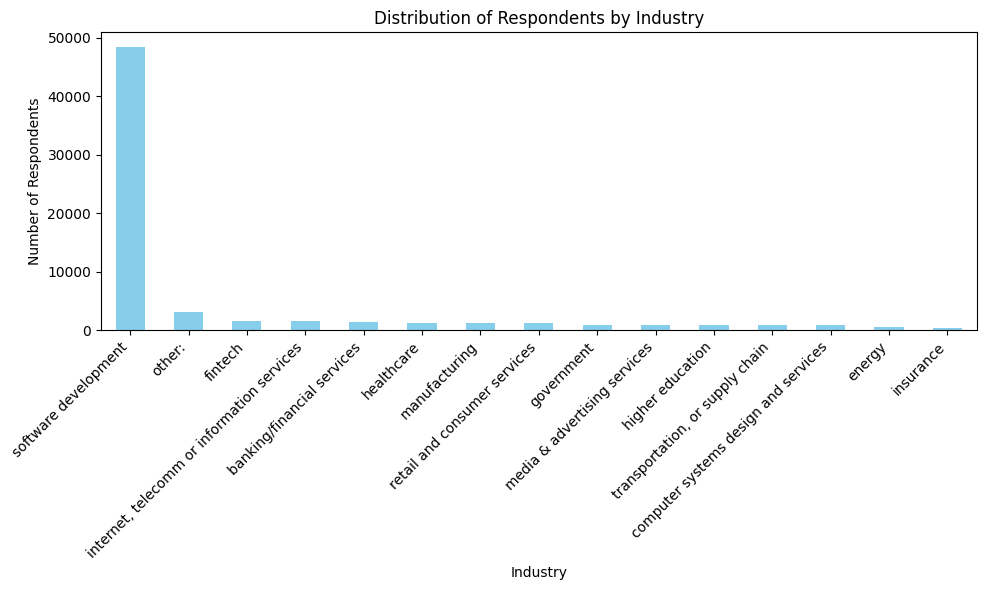

In [4]:
# Count the number of respondents in each industry
industry_distribution = df['Industry'].value_counts()

# Plot the bar chart for industry distribution
industry_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding labels and title for better clarity
import matplotlib.pyplot as plt

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


🧠 Notable Trends:
Software development dominates the dataset — over 48,000 respondents.

There’s a sharp drop after software, with “other” being a broad category.

Tech-related fields (e.g., internet services, fintech, systems design) collectively account for a large share.

Government, education, and transportation sectors have moderate representation.

Insurance and energy industries have the least representation.

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
# Basic statistics
mean_salary = df['ConvertedCompYearly'].mean()
median_salary = df['ConvertedCompYearly'].median()
std_salary = df['ConvertedCompYearly'].std()

print(f"Mean: {mean_salary:,.2f}")
print(f"Median: {median_salary:,.2f}")
print(f"Standard Deviation: {std_salary:,.2f}")
# Threshold for outliers
threshold = mean_salary + 3 * std_salary

# Filter extreme compensation values
high_earners = df[df['ConvertedCompYearly'] > threshold]

print(f"Number of high earners (above {threshold:,.2f}):", len(high_earners))
# View top high earners
high_earners[['ConvertedCompYearly', 'Employment', 'Country', 'Industry']].sort_values(by='ConvertedCompYearly', ascending=False).head()

from scipy.stats import zscore

df['zscore'] = zscore(df['ConvertedCompYearly'])
outliers_z = df[abs(df['zscore']) > 3]
print(f"Z-score method - outliers found: {outliers_z.shape[0]}")




Mean: 0.00
Median: -0.07
Standard Deviation: 1.00
Number of high earners (above 3.00): 194


ModuleNotFoundError: No module named 'scipy'

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [ ]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ConvertedCompYearly'], color="skyblue")
plt.title("Box Plot of ConvertedCompYearly")
plt.xlabel("Converted Compensation (Yearly)")
plt.show()


This likely indicates:

The ConvertedCompYearly column is heavily skewed or normalized, possibly containing:

A large number of placeholder values like -0.0675

Or it has been transformed (e.g., standardized, log-transformed)
Or use a z-score approach instead of IQR:

from scipy.stats import zscore

df['zscore'] = zscore(df['ConvertedCompYearly'])
outliers_z = df[abs(df['zscore']) > 3]
print(f"Z-score method - outliers found: {outliers_z.shape[0]}")

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
# Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_no_outliers.shape}")

NameError: name 'lower_bound' is not defined

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [16]:
# First, clean the Age values to lowercase and remove extra wording
df['Age_clean'] = df['Age'].str.lower().str.strip()

# Define a flexible mapping dictionary for cleaned age strings
age_map_clean = {
    'under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'prefer not to say': None
}

# Map the cleaned age values to numeric values
df['Age_numeric'] = df['Age_clean'].map(age_map_clean)

# Check the result
#print(df[['Age', 'Age_numeric']].drop_duplicates())
#numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
#numeric_cols

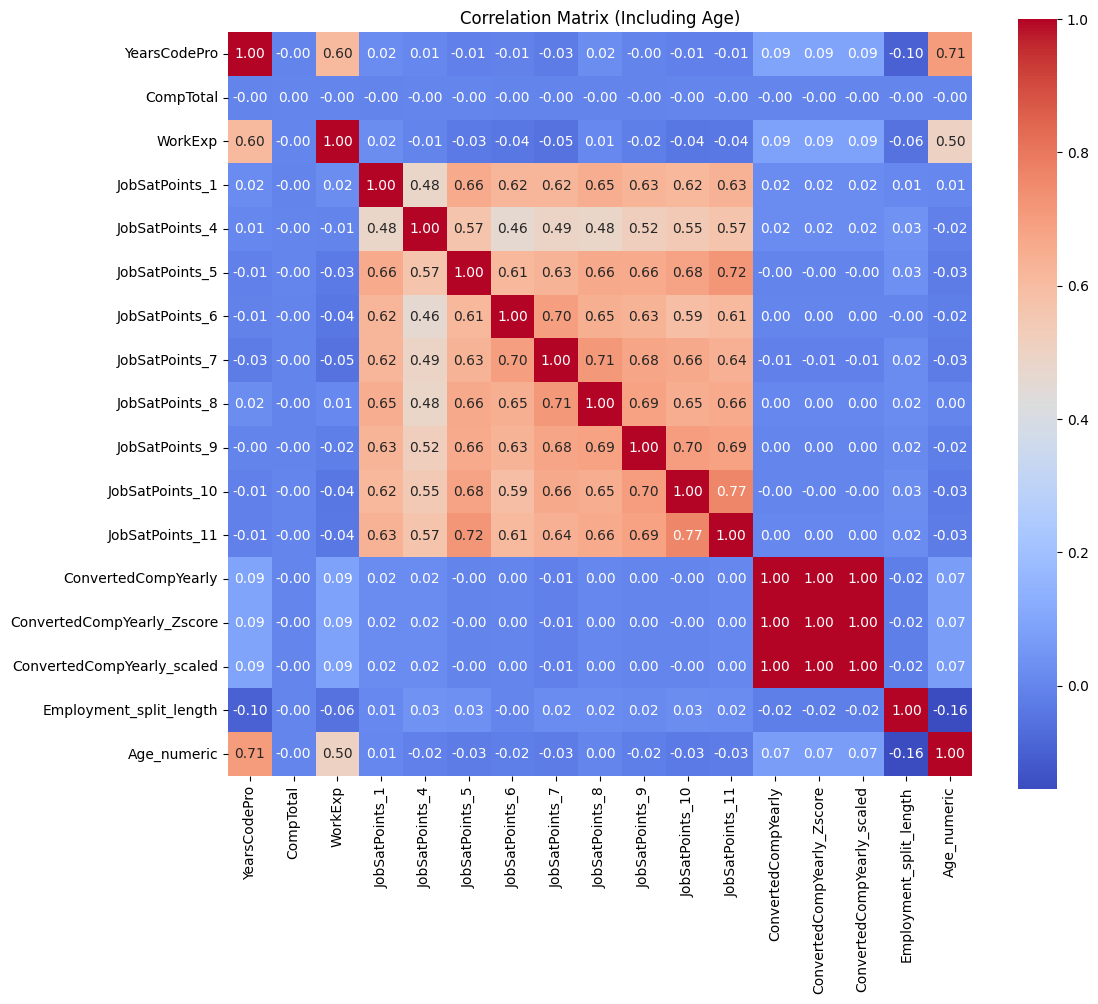

In [21]:
numeric_cols = [
    'YearsCodePro',
    'CompTotal',
    'WorkExp',
    'JobSatPoints_1',
    'JobSatPoints_4',
    'JobSatPoints_5',
    'JobSatPoints_6',
    'JobSatPoints_7',
    'JobSatPoints_8',
    'JobSatPoints_9',
    'JobSatPoints_10',
    'JobSatPoints_11',
    'ConvertedCompYearly',
    'ConvertedCompYearly_Zscore',
    'ConvertedCompYearly_scaled',
    'Employment_split_length',
    'Age_numeric'
]

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Visualize it
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Including Age)")
plt.show()


🔍 Key Observations:
💼 Experience-Related Variables
YearsCodePro and WorkExp have a strong positive correlation (0.60), as expected — more coding years often means more overall work experience.

Age_numeric also strongly correlates with both YearsCodePro (0.70) and WorkExp (0.50), which aligns with logical expectations.

💰 Compensation
ConvertedCompYearly shows weak correlation with:

YearsCodePro (0.094)

WorkExp (0.085)

Age_numeric (0.071)

💡 Suggests compensation might be influenced by other factors not captured here (e.g., location, job role, company size).

😊 Job Satisfaction (JobSatPoints_1 to JobSatPoints_11)
Strong internal correlations among the different JobSatPoints_* columns (e.g., 0.65–0.76). This implies they are likely derived from the same or similar job satisfaction questions/responses.

Job satisfaction variables show:

Weak or no correlation with YearsCodePro, WorkExp, or CompTotal.

Slight negative correlation with Employment_split_length, which could hint that frequent job changes may be linked with lower satisfaction (but very weak).

🧮 Other Notables
Employment_split_length is negatively correlated with YearsCodePro (-0.099), WorkExp (-0.055), and Age_numeric (-0.09), possibly suggesting that more experienced individuals have more stable employment patterns.

<h3> Summary </h3>


In [22]:
df.to_csv("cleaned_analyzed_visualized_survey_data.csv", index=False)

In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
